In [13]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

In [14]:
# Open the NetCDF file
cwd = "./"
domain = "d03"
date = "2021-04-11"
time = "12_00_00"
file_name = "wrfout_"+domain+"_"+date+"_"+time
ncfile = nc.Dataset(cwd+file_name)

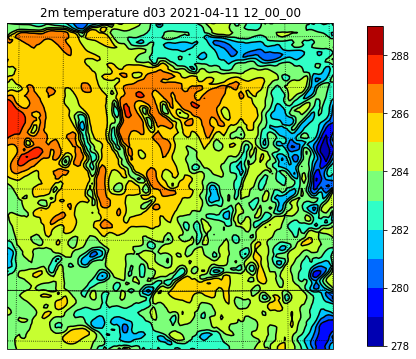

In [15]:
# Get the sea level pressure
var_name = "T2"
var_fullname = "2m temperature"
var = getvar(ncfile, var_name)

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_var = smooth2d(var, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(var)

# Get the cartopy mapping object
cart_proj = get_cartopy(var)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_var), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_var), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_var))
ax.set_ylim(cartopy_ylim(smooth_var))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

# Add the tile
title_name = var_fullname+" "+domain+" "+date+" "+time
plt.title(title_name)

fig_name = var_name+"_"+domain+"_"+date+"_"+time+".png"
plt.savefig(cwd+fig_name)
plt.show()